In [1]:
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
from ZX_dualities import *
from XY_dualities import *
import pickle

## [[5,1,3]] - 5 qubit perfect code

$$S = \langle XZZXI, IXZZX, XIXZZ, ZXIXZ \rangle$$

#### Define code

#### Automorphism group generators from MAGMA

In [16]:
n = 5
k = 1 
d = 3
stabs = ['XZZXI','IXZZX','XIXZZ','ZXIXZ']
H_symp = stabs_to_H_symp(stabs)
G,LX,LZ,D = compute_standard_form(H_symp)
print(binary_vecs_to_paulis(G[2]))
print(binary_vecs_to_paulis(LX))

[['Z', 'Z', 'X', 'I', 'X']]
[['Z', 'I', 'I', 'Z', 'X']]


In [3]:
code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./')
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  360
Time:  0.02
No of aut gens:  6


## Circuit 1

In [4]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_aut(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    circ = logical_circ_and_pauli_correct(H_symp,phys_circ).run()
    circuits.append(circ)

p [2 0 2 0 3 2]
[0]
[0 2]
[0 1]
[1 2 3]
[1 4 9]
[0 1 2 9]
q [2 0 2 2 0 2]
[0 0 0 2 3 0]
p [2 2 2 2 2 2]
[1 2 3]
[0 1 3]
[0 2 3]
[0 1 2]
[1 2 4]
[0 1 2 3 9]
q [2 2 2 2 2 2]
[0 0 0 0 0 0]
p [0 2 0 2 3 2]
[0 1 2]
[2 3]
[1 3]
[3]
[2 4 9]
[1 2 3 9]
q [2 2 0 2 0 2]
[2 0 0 0 3 0]
p [2 2 2 2 2 1]
[0 1 3]
[2 3]
[0 1]
[0 2 3]
[0 3 9]
[0 1 2 3 4 9]
q [2 2 2 2 0 2]
[0 0 0 0 2 3]
p [0 2 2 2 2 1]
[0 2]
[0]
[0 1 2]
[2 3]
[2 9]
[0 2 4 9]
q [0 2 2 2 0 2]
[0 0 0 0 2 3]
p [2 2 2 2 2 2]
[0 1 2 3]
[0 2 3]
[1 2 3]
[0 1 3]
[0 1 3 4]
[0 1 2 9]
q [2 2 2 2 2 2]
[0 0 0 0 0 0]


[('S', 1)]


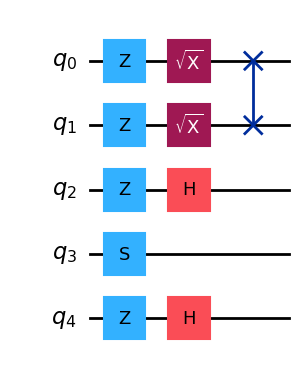

In [5]:
# physical circuit
circ = circuits[0]
print(circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 2

Logical Act: []


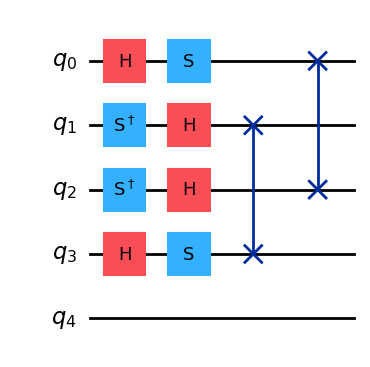

In [6]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 3

Logical Act: [('S', 1)]


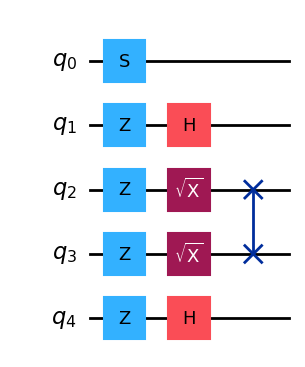

In [7]:
circ = circuits[2]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 4

Logical Act: [('H', 1), ('S', 1)]


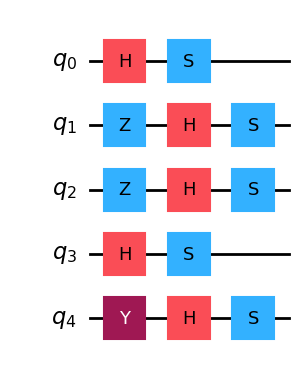

In [8]:
circ = circuits[3]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

## Circuit 5

Logical Act: [('H', 1), ('S', 1)]


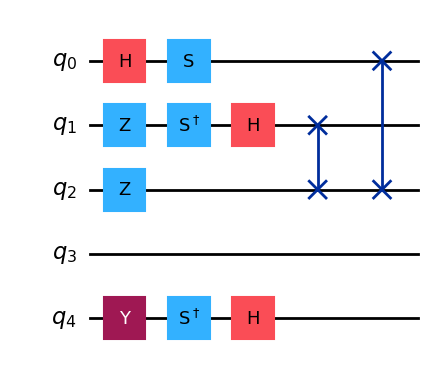

In [9]:
circ = circuits[4]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# ZX duality

In [10]:
code_auts_dict = qec_code_ZX_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./')
filename = f'./ZX_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  20
Time:  0.01
No of aut gens:  3


In [11]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_ZX_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = act.run()
    circuits.append(circ)
    print(circ[0])
    print(act.new_tableux_anticomm())
    print()

p [2 0 0 2 0 0]
[0 1]
[1]
[1 3]
[1 2]
[1 4]
[9]
q [2 0 0 2 0 0]
[0 0 0 0 0 0]
[]
(array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]]), array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))

p [2 0 0 2 0 0]
[0 2 3]
[1]
[0 3]
[0 1 2]
[0 9]
[0 1 2 3 4]
q [2 0 0 2 2 2]
[0 0 0 0 2 2]
[('H', 1)]
(array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]]), array([[1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0

Logical Act: [('H', 1)]


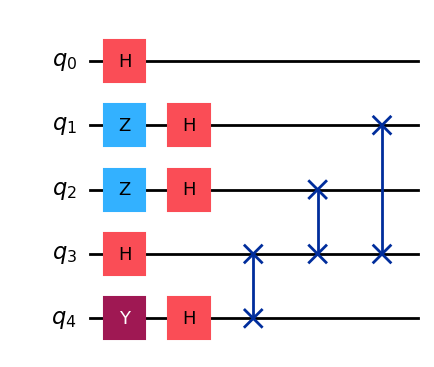

In [12]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')

# XY duality

In [13]:
code_auts_dict = qec_code_XY_dualities_from_magma_with_intersection(n,k,d,H_symp).run(fileroot='./')
filename = f'./XY_dualities_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  20
Time:  0.01
No of aut gens:  3


In [14]:
auts = code_auts_dict['auts']
circuits = []
for num, aut in enumerate(auts):
    #print('Aut Gen',num)
    phys_act = circ_from_XY_duality(H_symp,aut)        
    phys_circ, _ = phys_act.circ()
    act = logical_circ_and_pauli_correct(H_symp,phys_circ)
    circ = act.run()
    circuits.append(circ)
    print(act.new_tableux_anticomm())
    print(circ[0])
    print()

p [2 0 0 2 0 0]
[0 1]
[1]
[1 3]
[1 2]
[1 4]
[9]
q [2 0 0 2 0 0]
[0 0 0 0 0 0]
(array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0]]), array([[0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))
[]

p [0 2 2 0 1 0]
[0 2]
[2 3]
[1 2]
[2]
[2 4 9]
[9]
q [0 2 2 0 0 0]
[0 0 0 0 1 0]
(array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0

Logical Act: [('S', 1)]


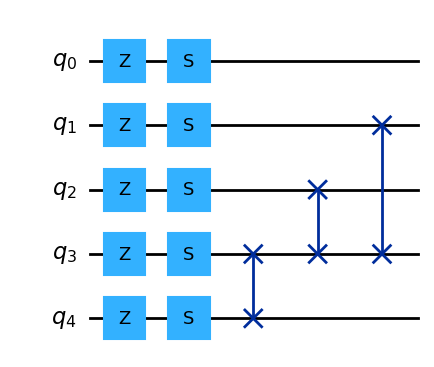

In [15]:
circ = circuits[1]
print('Logical Act:', circ[0])
qc = construct_circuit(circ[1], n)
qc.draw(output='mpl')